In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import pdvega
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [3]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 6432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='6432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: postgres


In [4]:
from sqlalchemy import create_engine,text
con= create_engine('postgresql://eicu@192.168.60.144:6432/eicu')

In [2]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir2 = '/home/mei/nas/docker/processedData_2/'

In [6]:
def round_up(x, base=5):
    return base * round(x/base)

In [9]:
query = query_schema + """
select vp.*
from vitalperiodic vp
join patient_2 p
  on vp.patientunitstayid = p.patientunitstayid
  
order by p.patientunitstayid, vp.observationoffset
"""

In [10]:
df_vitalp= pd.read_sql_query(query,con)
df_vitalp.head(n=20)

,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,37449174,141168,119,NaN,93.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37448979,141168,124,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37448785,141168,129,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37448594,141168,134,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37448402,141168,139,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,37448210,141168,144,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,37448020,141168,149,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,37447831,141168,154,NaN,NaN,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,37447641,141168,159,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,37447450,141168,164,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
vitalp = df_vitalp.copy()
# Set indices
vitalp.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
vitalp.drop(vitalp.index[np.where(vitalp.index.get_level_values('observationoffset') < 0)], inplace= True)
vitalp.drop(columns = 'vitalperiodicid', inplace= True)
vitalp.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)
# Resample every 5 mins
vitalp.rename(round_up, level = 'observationoffset', inplace = True)
vitalp = vitalp.groupby(['patientunitstayid', 'observationoffset']).mean()

In [12]:
vitalp.head(n=10)

temperature  sao2  heartrate  \
patientunitstayid observationoffset                                 
141168            120                        NaN  93.0      140.0   
                  125                        NaN   NaN      140.0   
                  130                        NaN   NaN      140.0   
                  135                        NaN   NaN      140.0   
                  140                        NaN   NaN      140.0   
                  145                        NaN   NaN      140.0   
                  150                        NaN   NaN      140.0   
                  155                        NaN   NaN      136.0   
                  160                        NaN   NaN      132.0   
                  165                        NaN   NaN      132.0   

                                     respiration  cvp  etco2  \
patientunitstayid observationoffset                            
141168            120                        NaN  NaN    NaN   
                  125                        NaN  NaN    NaN   
                  130                        NaN  NaN    NaN   
                  135                        NaN  NaN    NaN   
                  140                        NaN  NaN    NaN   
                  145                        NaN  NaN    NaN   
                  150                        NaN  NaN    NaN   
                  155                        NaN  NaN    NaN   
                  160                        NaN  NaN    NaN   
                  165                        NaN  NaN    NaN   

                                     systemicsystolic  systemicdiastolic  \
patientunitstayid observationoffset                                        
141168            120                             NaN                NaN   
                  125                             NaN                NaN   
                  130                             NaN                NaN   
                  135                             NaN                NaN   
                  140                             NaN                NaN   
                  145                             NaN                NaN   
                  150                             NaN                NaN   
                  155                             NaN                NaN   
                  160                             NaN                NaN   
                  165                             NaN                NaN   

                                     systemicmean  pasystolic  padiastolic  \
patientunitstayid observationoffset                                          
141168            120                         NaN         NaN          NaN   
                  125                         NaN         NaN          NaN   
                  130                         NaN         NaN          NaN   
                  135                         NaN         NaN          NaN   
                  140                         NaN         NaN          NaN   
                  145                         NaN         NaN          NaN   
                  150                         NaN         NaN          NaN   
                  155                         NaN         NaN          NaN   
                  160                         NaN         NaN          NaN   
                  165                         NaN         NaN          NaN   

                                     pamean  st1  st2  st3  icp  
patientunitstayid observationoffset                              
141168            120                   NaN  NaN  NaN  NaN  NaN  
                  125                   NaN  NaN  NaN  NaN  NaN  
                  130                   NaN  NaN  NaN  NaN  NaN  
                  135                   NaN  NaN  NaN  NaN  NaN  
                  140                   NaN  NaN  NaN  NaN  NaN  
                  145                   NaN  NaN  NaN  NaN  NaN  
                  150                   NaN  NaN  NaN  NaN  N

In [3]:
# vitalp.to_csv(porcesseddir2 + 'selected_vitalPeriodic.csv',  index=True)

vitalp= pd.read_csv(porcesseddir2 + 'selected_vitalPeriodic.csv')
vitalp.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
vitalp.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)

In [12]:
n=len(list(vitalp.index.get_level_values('patientunitstayid').unique()))
r=len(vitalp)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(n,r))

There are 67691 unique patientunitstayid in the selected patients with the total 57490820 records.


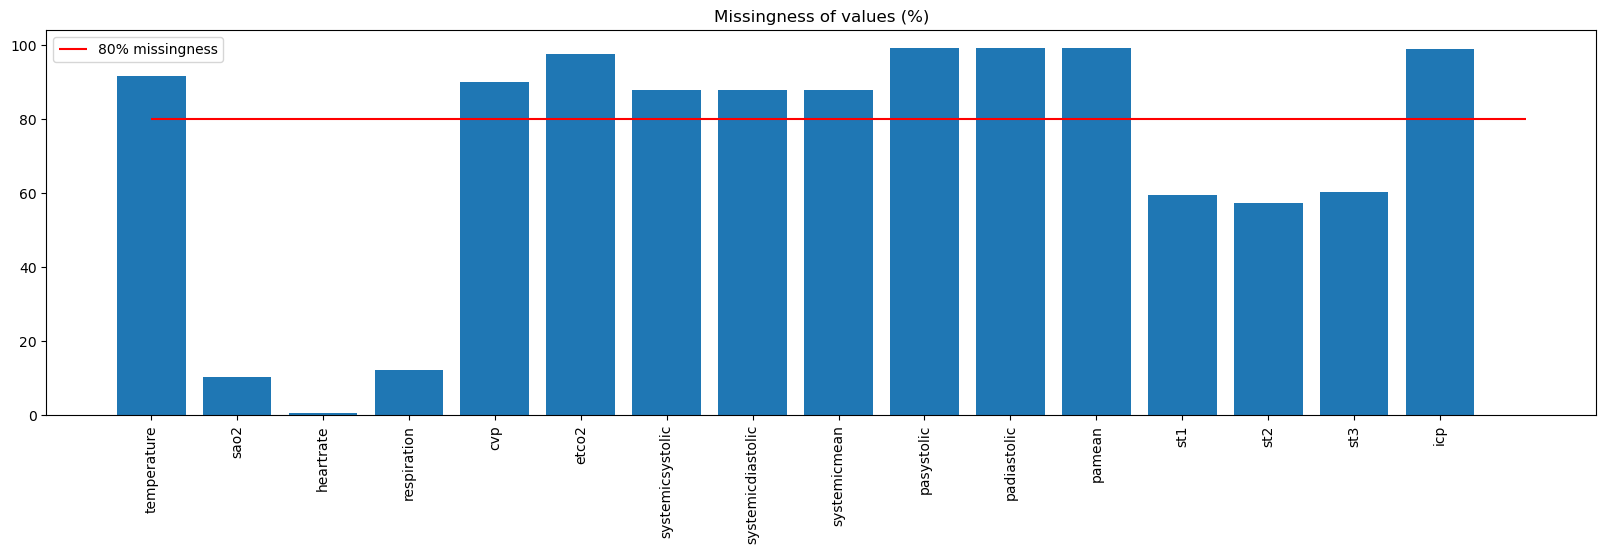

In [13]:
df=vitalp.copy()
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio']) * 100
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [20]:
vitalp

temperature  sao2  heartrate  \
patientunitstayid observationoffset                                 
141168            120                        NaN  93.0      140.0   
                  125                        NaN   NaN      140.0   
                  130                        NaN   NaN      140.0   
                  135                        NaN   NaN      140.0   
                  140                        NaN   NaN      140.0   
...                                          ...   ...        ...   
3353251           16220                      NaN  84.0       73.0   
                  16225                      NaN  68.0       74.0   
                  16230                      NaN  82.0       73.0   
                  16235                      NaN  95.0       70.0   
                  16240                      NaN  96.0       70.0   

                                     respiration  cvp  etco2  \
patientunitstayid observationoffset                            
141168            120                        NaN  NaN    NaN   
                  125                        NaN  NaN    NaN   
                  130                        NaN  NaN    NaN   
                  135                        NaN  NaN    NaN   
                  140                        NaN  NaN    NaN   
...                                          ...  ...    ...   
3353251           16220                      NaN  NaN    NaN   
                  16225                      NaN  NaN    NaN   
                  16230                      NaN  NaN    NaN   
                  16235                      NaN  NaN    NaN   
                  16240                      NaN  NaN    NaN   

                                     systemicsystolic  systemicdiastolic  \
patientunitstayid observationoffset                                        
141168            120                             NaN                NaN   
                  125                             NaN                NaN   
                  130                             NaN                NaN   
                  135                             NaN                NaN   
                  140                             NaN                NaN   
...                                               ...                ...   
3353251           16220                           NaN                NaN   
                  16225                           NaN                NaN   
                  16230                           NaN                NaN   
                  16235                           NaN                NaN   
                  16240                           NaN                NaN   

                                     systemicmean  pasystolic  padiastolic  \
patientunitstayid observationoffset                                          
141168            120                         NaN         NaN          NaN   
                  125                         NaN         NaN          NaN   
                  130                         NaN         NaN          NaN   
                  135                         NaN         NaN          NaN   
                  140                         NaN         NaN          NaN   
...                                           ...         ...          ...   
3353251           16220                       NaN         NaN          NaN   
                  16225                       NaN         NaN          NaN   
                  16230                       NaN         NaN          NaN   
                  16235                       NaN         NaN          NaN   
                  16240                       NaN         NaN          NaN   

                                     pamean  st1  st2  st3  icp  
patientunitstayid observationoffset                              
141168            120                   NaN  NaN  NaN  NaN  NaN  
                  125                   NaN  NaN  NaN  NaN  NaN  
                  130                 

In [14]:
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
padiastolic,99.233759
pasystolic,99.233719
pamean,99.226772
icp,98.994351
etco2,97.753351
temperature,91.636574
cvp,89.967245
systemicdiastolic,87.934308
systemicsystolic,87.932545
systemicmean,87.842751


In [4]:
df_drop_non=vitalp.copy()
df_drop_non = df_drop_non.dropna(how='all', subset=df_drop_non.columns[2:]) 

In [5]:
df_drop_non

temperature  sao2  heartrate  \
patientunitstayid observationoffset                                 
141168            120                        NaN  93.0      140.0   
                  125                        NaN   NaN      140.0   
                  130                        NaN   NaN      140.0   
                  135                        NaN   NaN      140.0   
                  140                        NaN   NaN      140.0   
...                                          ...   ...        ...   
3353251           16220                      NaN  84.0       73.0   
                  16225                      NaN  68.0       74.0   
                  16230                      NaN  82.0       73.0   
                  16235                      NaN  95.0       70.0   
                  16240                      NaN  96.0       70.0   

                                     respiration  cvp  etco2  \
patientunitstayid observationoffset                            
141168            120                        NaN  NaN    NaN   
                  125                        NaN  NaN    NaN   
                  130                        NaN  NaN    NaN   
                  135                        NaN  NaN    NaN   
                  140                        NaN  NaN    NaN   
...                                          ...  ...    ...   
3353251           16220                      NaN  NaN    NaN   
                  16225                      NaN  NaN    NaN   
                  16230                      NaN  NaN    NaN   
                  16235                      NaN  NaN    NaN   
                  16240                      NaN  NaN    NaN   

                                     systemicsystolic  systemicdiastolic  \
patientunitstayid observationoffset                                        
141168            120                             NaN                NaN   
                  125                             NaN                NaN   
                  130                             NaN                NaN   
                  135                             NaN                NaN   
                  140                             NaN                NaN   
...                                               ...                ...   
3353251           16220                           NaN                NaN   
                  16225                           NaN                NaN   
                  16230                           NaN                NaN   
                  16235                           NaN                NaN   
                  16240                           NaN                NaN   

                                     systemicmean  pasystolic  padiastolic  \
patientunitstayid observationoffset                                          
141168            120                         NaN         NaN          NaN   
                  125                         NaN         NaN          NaN   
                  130                         NaN         NaN          NaN   
                  135                         NaN         NaN          NaN   
                  140                         NaN         NaN          NaN   
...                                           ...         ...          ...   
3353251           16220                       NaN         NaN          NaN   
                  16225                       NaN         NaN          NaN   
                  16230                       NaN         NaN          NaN   
                  16235                       NaN         NaN          NaN   
                  16240                       NaN         NaN          NaN   

                                     pamean  st1  st2  st3  icp  
patientunitstayid observationoffset                              
141168            120                   NaN  NaN  NaN  NaN  NaN  
                  125                   NaN  NaN  NaN  NaN  NaN  
                  130                 

In [6]:
n=len(list(df_drop_non.index.get_level_values('patientunitstayid').unique()))
r=len(df_drop_non)
print("There are {} unique patientunitstayid in the selected patients with the total {} records after deleting the patient who did't take any lab test.".format(n,r))

There are 67631 unique patientunitstayid in the selected patients with the total 57321508 records after deleting the patient who did't take any lab test.


In [21]:
missing_ratio = pd.DataFrame(df_drop_non.isna().sum() / len(df_drop_non.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
padiastolic,99.231496
pasystolic,99.231456
pamean,99.224488
icp,98.991380
etco2,97.746715
temperature,91.619041
cvp,89.937611
systemicdiastolic,87.898670
systemicsystolic,87.896901
systemicmean,87.806842
